In [ ]:
import io

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from google.colab import files

In [ ]:
upload = files.upload()['Housing Pricing.csv']

Saving Housing Pricing.csv to Housing Pricing (3).csv


In [ ]:
data = io.BytesIO(upload)
data_frame = pd.read_csv(data)
data_frame.head()
data_frame.drop('Id',inplace=True, axis=1)

# Preparing the dataset

In [ ]:
# Find features with missing values
features_missing_values = list(data_frame.columns[data_frame.isna().any()])
features_missing_values

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [ ]:
# Collect features that will use mean fill and back fill
mean_fill, back_fill = [], []
for feat in features_missing_values:
  if data_frame[feat].dtype == "float64":
    mean_fill.append(feat)
  else:
    back_fill.append(feat)

In [ ]:
for feat in mean_fill:
  data_frame.fillna(data_frame[feat].mean(),inplace=True)

## Fill the values

In [ ]:
for feat in back_fill:
  data_frame.fillna(method='bfill',inplace=True)

In [ ]:
# Check for remaining features with missing values
sum(data_frame.columns[data_frame.isna().any()])

0

# Encode the dataset

In [ ]:
non_numerical_features = list(data_frame.select_dtypes(include='object').columns)
numerical_features = list(data_frame.select_dtypes(exclude='object').columns)
print(numerical_features)
print(non_numerical_features)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'Garag

In [ ]:
data_frame[non_numerical_features].head(100).tail(20)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
80,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,Gd,CBlock,Gd,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
81,RM,Pave,Reg,Lvl,AllPub,FR2,Gtl,Mitchel,Norm,Norm,TwnhsE,1Story,Hip,CompShg,VinylSd,VinylSd,BrkFace,TA,Gd,PConc,Ex,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,70.05,Attchd,Fin,TA,TA,Y,WD,Normal
82,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
83,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,BrkCmn,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,70.05,Detchd,Unf,TA,TA,Y,COD,Normal
84,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,BuiltIn,Fin,TA,TA,Y,WD,Normal
85,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Hip,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,Unf,TA,TA,Y,WD,Normal
86,RL,Pave,IR2,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,WD,Normal
87,FV,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,Av,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,70.05,Detchd,RFn,TA,TA,Y,New,Partial
88,C (all),Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,Hip,CompShg,Plywood,Plywood,None,Fa,Fa,CBlock,TA,Fa,No,Unf,Unf,GasA,TA,N,SBrkr,Fa,Typ,70.05,70.05,70.05,70.05,70.05,N,ConLD,Abnorml
89,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,70.05,70.05,70.05,70.05,70.05,Y,WD,Normal


In [ ]:
nominal = ['MSZoning','Street','RoofStyle','Neighborhood']
ordinal = list(set(non_numerical_features) - set(nominal))

In [ ]:
nominal_df = pd.get_dummies(data_frame[nominal])
nominal_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1456,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1457,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1458,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
for feat in ordinal:
  data_frame[feat] = data_frame[feat].astype('category').cat.codes

ordinal_df = data_frame[ordinal]
ordinal_df

,SaleType,ExterCond,MasVnrType,ExterQual,BsmtFinType2,LandSlope,KitchenQual,Functional,Electrical,BldgType,Foundation,BsmtCond,PavedDrive,RoofMatl,LotConfig,LandContour,GarageQual,GarageType,GarageFinish,BsmtFinType1,Exterior1st,HouseStyle,Exterior2nd,FireplaceQu,CentralAir,BsmtExposure,Condition1,Utilities,BsmtQual,HeatingQC,LotShape,SaleCondition,Heating,GarageCond,Condition2
0,8,4,2,2,6,0,2,6,5,0,2,4,2,1,4,3,5,2,2,3,12,5,13,0,1,4,2,0,3,0,3,4,1,5,2
1,8,4,3,3,6,0,3,6,5,0,1,4,2,1,2,3,5,2,2,1,8,2,8,5,1,2,1,0,3,0,3,4,1,5,2
2,8,4,2,2,6,0,2,6,5,0,2,4,2,1,4,3,5,2,2,3,12,5,13,5,1,3,2,0,3,0,0,4,1,5,2
3,8,4,3,3,6,0,2,6,5,0,0,2,2,1,0,3,5,6,3,1,13,5,15,3,1,4,2,0,4,2,0,0,1,5,2
4,8,4,2,2,6,0,2,6,5,0,2,4,2,1,2,3,5,2,2,3,12,5,13,5,1,1,2,0,3,0,0,4,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,8,4,3,3,6,0,3,6,5,0,2,4,2,1,4,3,5,2,2,6,12,5,13,5,1,4,2,0,3,0,3,4,1,5,2
1456,8,4,4,3,5,0,3,2,5,0,1,4,2,1,4,3,5,2,3,1,9,2,10,5,1,4,2,0,3,4,3,4,1,5,2
1457,8,2,3,0,6,0,2,6,5,0,4,2,2,1,4,3,5,2,2,3,5,5,5,3,1,4,2,0,4,0,3,4,1,5,2
1458,8,4,3,3,5,0,2,6,1,0,1,4,2,1,4,3,5,2,3,3,8,2,8,0,1,3,2,0,4,2,3,4,1,5,2


In [ ]:
encoded_data = pd.concat([nominal_df, ordinal_df,data_frame[numerical_features]],axis=1)
encoded_data

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,SaleType,ExterCond,...,Heating,GarageCond,Condition2,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,4,...,1,5,2,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,4,...,1,5,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,4,...,1,5,2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,4,...,1,5,2,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,4,...,1,5,2,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,4,...,1,5,2,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,4,...,1,5,2,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2,...,1,5,2,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8,4,...,1,5,2,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
encoded_data.drop('SalePrice',inplace=True,axis=1)
encoded_data

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,SaleType,ExterCond,...,SaleCondition,Heating,GarageCond,Condition2,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,4,...,4,1,5,2,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,4,...,4,1,5,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,4,...,4,1,5,2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,4,...,0,1,5,2,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,4,...,4,1,5,2,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,4,...,4,1,5,2,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007
1456,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,4,...,4,1,5,2,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010
1457,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2,...,4,1,5,2,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010
1458,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8,4,...,4,1,5,2,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010


# Standardize the features

In [ ]:
X = encoded_data.to_numpy()
X.shape

(1460, 109)

In [ ]:
target = ['SalePrice']
y = data_frame[target].to_numpy()
y.shape

(1460, 1)

In [ ]:
X = StandardScaler().fit_transform(X)
X

array([[-0.08304548, -0.21585871, -0.10526316, ..., -0.08768781,
        -1.5991111 ,  0.13877749],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.08768781,
        -0.48911005, -0.61443862],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.08768781,
         0.99089135,  0.13877749],
       ...,
       [-0.08304548, -0.21585871, -0.10526316, ...,  4.95311151,
        -0.48911005,  1.64520971],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.08768781,
        -0.8591104 ,  1.64520971],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.08768781,
        -0.1191097 ,  0.13877749]])

In [ ]:
y = StandardScaler().fit_transform(y)
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

# L1 feature selection

In [ ]:
regressor = LassoCV()
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
coef_col = pd.Series(regressor.coef_,index=encoded_data.columns)
selected_features = []
for label, value in zip(coef_col.index, coef_col.values):
  if value != 0:
    selected_features.append(label)

selected_features

['MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'RoofStyle_Flat',
 'RoofStyle_Hip',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_Mitchel',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'SaleType',
 'MasVnrType',
 'ExterQual',
 'BsmtFinType2',
 'LandSlope',
 'KitchenQual',
 'Functional',
 'BldgType',
 'BsmtCond',
 'PavedDrive',
 'RoofMatl',
 'LandContour',
 'GarageFinish',
 'BsmtFinType1',
 'Exterior1st',
 'CentralAir',
 'BsmtExposure',
 'Utilities',
 'BsmtQual',
 'HeatingQC',
 'SaleCondition',
 'Condition2',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalf

In [ ]:
selected_X = encoded_data[selected_features]
selected_X

,MSZoning_C (all),MSZoning_FV,MSZoning_RM,Street_Grvl,Street_Pave,RoofStyle_Flat,RoofStyle_Hip,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Mitchel,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,SaleType,MasVnrType,ExterQual,BsmtFinType2,LandSlope,KitchenQual,Functional,BldgType,BsmtCond,PavedDrive,RoofMatl,LandContour,GarageFinish,BsmtFinType1,Exterior1st,CentralAir,BsmtExposure,Utilities,BsmtQual,HeatingQC,SaleCondition,Condition2,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,3SsnPorch,ScreenPorch,MoSold,YrSold
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2,2,6,0,2,6,0,4,2,1,3,2,3,12,1,4,0,3,0,4,2,60,65.0,8450,7,5,2003,2003,196.0,706,0,856,0,1710,1,0,2,3,1,8,0,2,0,0,0,2,2008
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,3,3,6,0,3,6,0,4,2,1,3,2,1,8,1,2,0,3,0,4,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,1262,0,1262,0,1,2,3,1,6,1,2,298,0,0,5,2007
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2,2,6,0,2,6,0,4,2,1,3,2,3,12,1,3,0,3,0,4,2,60,68.0,11250,7,5,2001,2002,162.0,486,0,920,0,1786,1,0,2,3,1,6,1,2,0,0,0,9,2008
3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8,3,3,6,0,2,6,0,2,2,1,3,3,1,13,1,4,0,4,2,0,2,70,60.0,9550,7,5,1915,1970,0.0,216,0,756,0,1717,1,0,1,3,1,7,1,3,0,0,0,2,2006
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,8,2,2,6,0,2,6,0,4,2,1,3,2,3,12,1,1,0,3,0,4,2,60,84.0,14260,8,5,2000,2000,350.0,655,0,1145,0,2198,1,0,2,4,1,9,1,3,192,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,3,3,6,0,3,6,0,4,2,1,3,2,6,12,1,4,0,3,0,4,2,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,0,1647,0,0,2,3,1,7,1,2,0,0,0,8,2007
1456,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8,4,3,5,0,3,2,0,4,2,1,3,3,1,9,1,4,0,3,4,4,2,20,85.0,13175,6,6,1978,1988,119.0,790,163,1542,0,2073,1,0,2,3,1,7,2,2,349,0,0,2,2010
1457,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8,3,0,6,0,2,6,0,2,2,1,3,2,3,5,1,4,0,4,0,4,2,70,66.0,9042,7,9,1941,2006,0.0,275,0,1152,0,2340,0,0,2,4,1,9,2,1,0,0,0,5,2010
1458,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,3,3,5,0,2,6,0,4,2,1,3,3,3,8,1,3,0,4,2,4,2,20,68.0,9717,5,6,1950,1996,0.0,49,1029,1078,0,1078,1,0,1,2,1,5,0,1,366,0,0,4,2010


# Split data to train and test data

In [ ]:
train_ratio = 0.7
test_ratio = 0.3

x_train, x_test, y_train, y_test = train_test_split(selected_X, y, test_size=test_ratio)

print(x_train.shape,y_train.shape)

(1022, 68) (1022, 1)


# Create the ANN model and train

In [ ]:
epochs = 80

model = Sequential()
model.add(Dense(32, input_shape=(selected_X.shape[1],), activation='relu'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001),loss="mse", metrics=['MSE'])

history = model.fit(x_train, y_train, verbose=1, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/80
32/32 [==============================] - 1s 16ms/step - loss: 0.8669 - MSE: 0.8669 - val_loss: 1.1808 - val_MSE: 1.1808
Epoch 2/80
32/32 [==============================] - 0s 3ms/step - loss: 0.9224 - MSE: 0.9224 - val_loss: 1.0798 - val_MSE: 1.0798
Epoch 3/80
32/32 [==============================] - 0s 3ms/step - loss: 0.8372 - MSE: 0.8372 - val_loss: 0.9696 - val_MSE: 0.9696
Epoch 4/80
32/32 [==============================] - 0s 3ms/step - loss: 0.6905 - MSE: 0.6905 - val_loss: 0.9443 - val_MSE: 0.9443
Epoch 5/80
32/32 [==============================] - 0s 3ms/step - loss: 0.7098 - MSE: 0.7098 - val_loss: 0.7127 - val_MSE: 0.7127
Epoch 6/80
32/32 [==============================] - 0s 3ms/step - loss: 0.5566 - MSE: 0.5566 - val_loss: 0.6392 - val_MSE: 0.6392
Epoch 7/80
32/32 [==============================] - 0s 3ms/step - loss: 0.4160 - MSE: 0.4160 - val_loss: 0.5790 - val_MSE: 0.5790
Epoch 8/80
32/32 [==============================] - 0s 3ms/step - loss: 0.4259 - MSE: 0.4

# Visualize performance

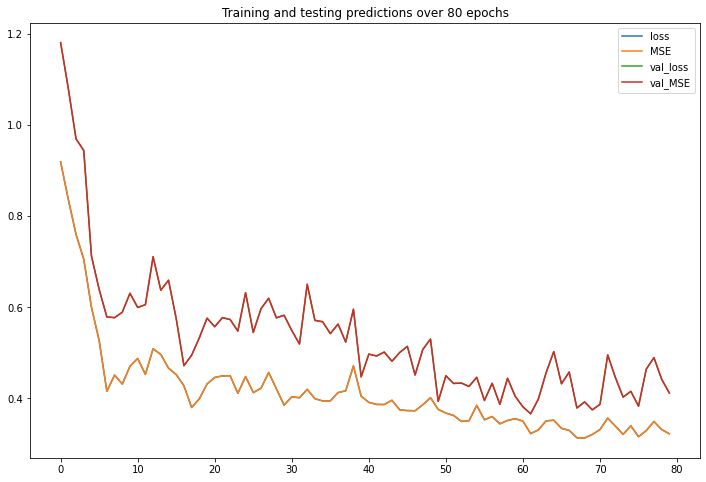

In [ ]:
historydf=pd.DataFrame(history.history, index=history.epoch)
historydf.plot(title=f"Training and testing predictions over {epochs} epochs",figsize=(12,8))